# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Project based on Udemy's course "Data Science and Machine Learning" - final solution may differ 

## Data and Setup

** Import numpy and pandas **

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

** Read in the csv file as a dataframe called df **

In [6]:
df = pd.read_csv('911.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [9]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

Top 5 zipcodes for 911 calls

In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls:

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique title codes:

In [10]:
print("Unique titles: {}".format(df['title'].nunique()) )

#Adding top5 for referene (notice \n to break lines)
print("\nTop 5 Titles:\n", df['title'].value_counts().head(5))

Unique titles: 110

Top 5 Titles:
 Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64


## Creating new features

Extraction of the Reason/department from 'title'

In [12]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Most common Reason for a 911 call: EMS

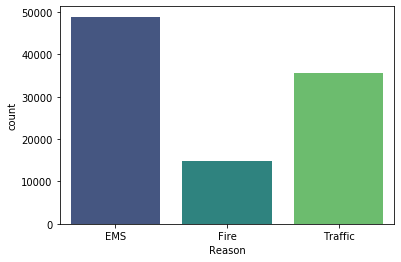

In [14]:
sns.countplot(x='Reason', data=df, palette='viridis') #Categorial plots: barplot and countplot

# timeStamp Column

In [14]:
type(df['timeStamp'].iloc[0])

str

The timestamps are still strings > Use [pd.to_datetime] to convert the column from strings to DateTime objects

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Extract hours, month and day of week and assign them to new columns

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.weekday()) #Monday = 0 | also .dayofweek

Convert day of the week to Mon, Tue, etc... for ease of use

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

Countplot of the Day of Week column with the hue based off of the Reason column

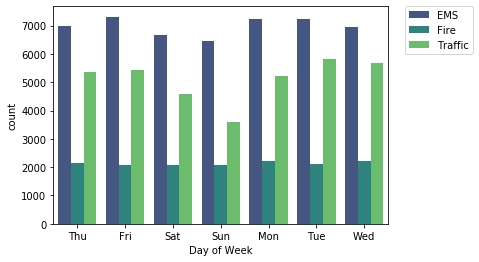

In [20]:
#The graph | .countplot() splitcitly counts the numbers of occurrences
sns.countplot(x='Day of Week',data=df, hue='Reason',palette='viridis')

#The legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

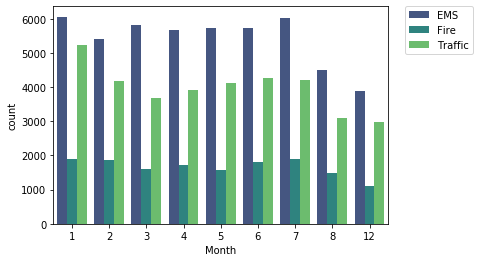

In [21]:
#The graph
sns.countplot(x='Month',data=df, hue='Reason',palette='viridis')

#The legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Summarize information by month

In [24]:
byMonth = df.groupby('Month').count() #the new df already captures .count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Visualize the calls by month

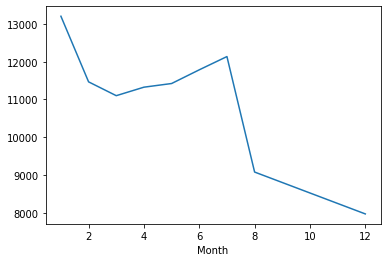

In [25]:
byMonth['e'].plot.line() #built-in Pandas visualization capabilities

Visualize date with lmplot

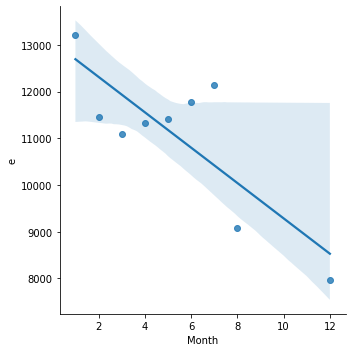

In [26]:
byMonth.reset_index() #reset index of the dataframe, which is needed for seaborn displays
sns.lmplot(x='Month',y='e',data=byMonth.reset_index())

Extrat date into a new column

In [27]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

Aggregate and plot the counts of 911 calls

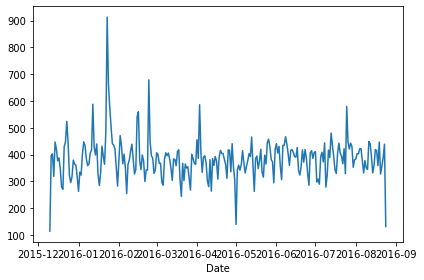

In [28]:
byDate = df.groupby('Date').count()
byDate['e'].plot.line()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

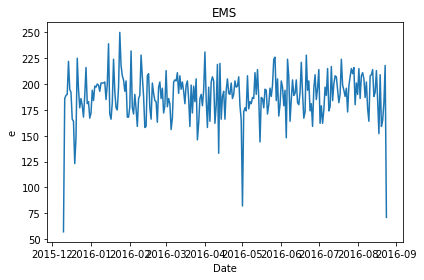

In [29]:
# Group by date and Reason
byDateEMS = df[df["Reason"]=="EMS"].groupby('Date').count()
byDateFire = df[df["Reason"]=="Fire"].groupby('Date').count()
byDateTraffic = df[df["Reason"]=="Traffic"].groupby('Date').count()

#plot as before with Seaborn
sns.lineplot(data=byDateEMS.reset_index(), y="e", x="Date")
plt.title('EMS')
plt.tight_layout()

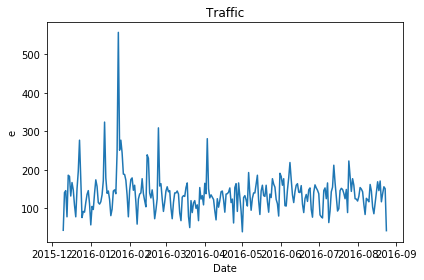

In [30]:
#plot as before with Seaborn
sns.lineplot(data=byDateTraffic.reset_index(), y="e", x="Date")
plt.title('Traffic')
plt.tight_layout()

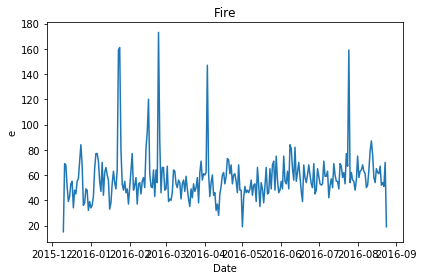

In [31]:
#plot as before with Seaborn
sns.lineplot(data=byDateFire.reset_index(), y="e", x="Date")
plt.title('Fire')
plt.tight_layout()

Visualize the day and time of the emergency call with a heatmap > See df.unstack()

In [32]:
#Groupby two variables and unstack to build pivot table... ATTENTION to the other variables
dayHour = df.groupby(['Day of Week','Hour']).count()['Reason'].unstack(level=-1)
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Create a HeatMap using this new DataFrame

Text(0.5, 1, 'Incidences by day and hour')

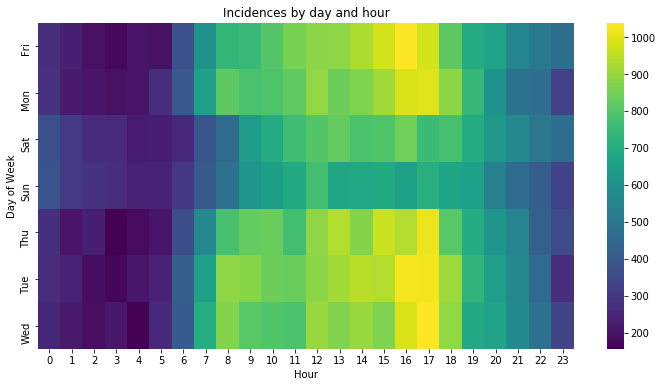

In [33]:
plt.figure(figsize=(12,6)) #It has to be outside 
sns.heatmap(dayHour,cmap='viridis')
plt.title('Incidences by day and hour')

Create a clustermap using this DataFrame

<Figure size 864x432 with 0 Axes>

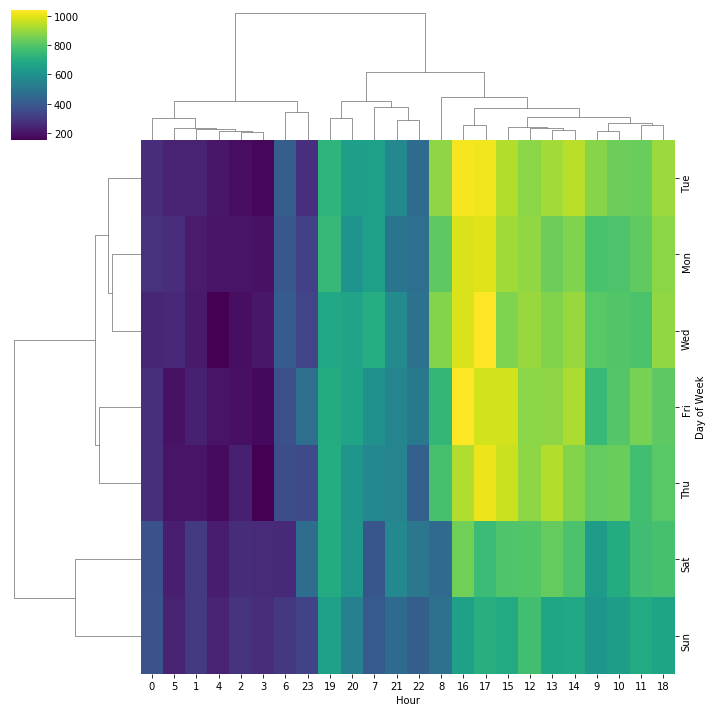

In [32]:
plt.figure(figsize=(12,6)) #It has to be outside 
sns.clustermap(dayHour,cmap='viridis')

Repeat these same plots and operations, for a DataFrame that shows the Month as the column

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat          2291  1441  1266  1734  1444  1388  1695  1099   978
Sun          1960  1229  1102  1488  1424  1333  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266
Tue          1973  1753  1884  1430  1918  1676  1670  1612  1234
Wed          1700  1903  1889  1517  1538  2058  1717  1295  1262


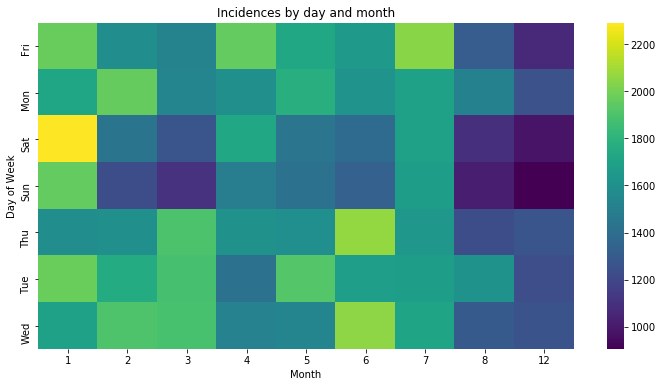

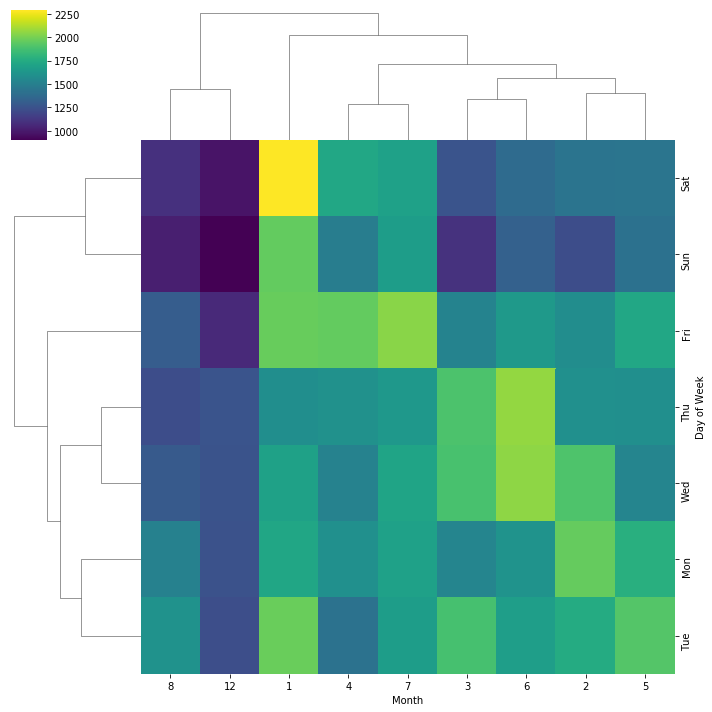

In [34]:
#Group by day and month
dayMonth = df.groupby(['Day of Week','Month']).count()['Reason'].unstack(level=-1)
print(dayMonth)

#Plot heatmap
plt.figure(figsize=(12,6)) #It has to be outside 
sns.heatmap(dayMonth,cmap='viridis')
plt.title('Incidences by day and month')

#plot clustermap
sns.clustermap(dayMonth,cmap='viridis')